# Image Sentinment Classification Project Overview:

Explore this image classification project where the goal was to teach a computer to recognize emotions in images, specifically distinguishing between 'happy' and 'sad' expressions. The key highlights include:

1. **Data Handling:**
   - Organized a dataset with images of happy and sad moments.
   - Ensured dataset consistency through careful examination.

2. **Model Development:**
   - Created a deep learning model using TensorFlow's Keras API.
   - Implemented a convolutional neural network (CNN) for effective image analysis.

3. **Training and Evaluation:**
   - Trained the model over 20 epochs, monitoring key metrics like loss, accuracy, precision, and recall.

4. **Testing:**
   - Evaluated the model's ability to recognize emotions in new images.
   - Conducted a random test with an image sourced from the internet.

5. **Model Deployment:**
   - Saved the trained model for future use.
   - Included code for loading the saved model seamlessly.

6. **GitHub Structure:**
   - Well-organized repository structure for easy navigation.
   - Visualizations showcasing the model's performance during training.

Feel free to delve into the codebase, dataset, and model files. Your feedback and questions are always welcome. Happy exploring!


## 1. Setup and Load Data 

We randomly downloaded images of happy and sad people from Google and saved in our data directory.

In [66]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [67]:
data_dir = 'data'

In [68]:
os.listdir('data')

['happy', 'sad']

In [69]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '106827976-1611251261868-twenty20_33fd1f3f-9221-4c64-bcb1-bfeec3022d9b.jpg',
 '1920px-face-smile.svg_.png',
 '1dd385ada2e2a3439b47f3cea5052ab46479c56a-1200x700.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'Couple_Happy_money_062618.jpg',
 'dv2051009.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'file-20230208-27-3jttof.jpg',
 'freedom-serenity-concept-fema

In [70]:
image_exts = ['jpeg','jpg','bmp','png']

In [71]:
# We iterate through images in each class directory, checks their file extensions, and removes any images with \
# unsupported formats. If an issue occurs during the process, it prints an error message.

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')

In [72]:
# loading our image data useing tf.keras
# Default size while loading images using tf is (256,256)

data = tf.keras.utils.image_dataset_from_directory('data')

Found 168 files belonging to 2 classes.


In [73]:
# Converting our tf dataset into a numpy itertor allowing for easy iteration over batches
data_iterator = data.as_numpy_iterator()

In [74]:
# Get another batch from iterator
batch = data_iterator.next()

In [75]:
# Images representated as np arrays
batch[0][0][0][0]

array([245.66664, 247.49539, 236.63148], dtype=float32)

In [76]:
# Labels for images
batch[1]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

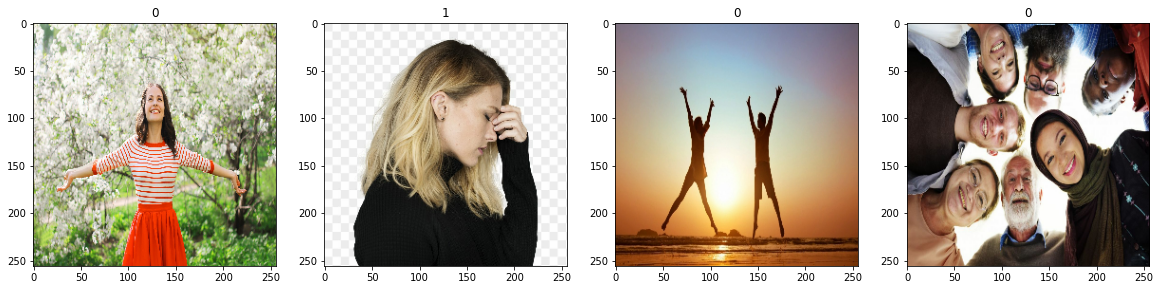

In [77]:
# Plotting images from the first batch
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### Note: From the above plots we can see that 0 label is for 'happy' pictures and 1 is for 'sad'  pictures

In [78]:
batch[0][0].shape

(256, 256, 3)

## 2. Preprocess data 

To enhance the model training process, we're normalizing our image pixel values, which originally range from 0 to 255, to a standardized scale of 0 to 1. This normalization ensures that all input features are on a consistent scale. This uniformity is crucial for the optimization algorithm during training, as it allows for more efficient convergence and avoids potential issues related to varying scales among different images and features.

In [79]:
data = data.map(lambda x,y: (x/255,y))

In [80]:
data.as_numpy_iterator().next()[0][0][0][:50]

array([[0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16078432, 0.15686275, 0.18039216],
       [0.16804534, 0.16412377, 0.18765318],
       [0.16862746, 0.16470589, 0.1882353 ],
       [0.16862746, 0.16470589, 0.1882353 ],
       [0.16862746, 0.16470589, 0.1882353 ],
       [0.

#### We can see above the values being scaled btw 0 and 1.

## 3. Split data 

In [81]:
len(data)

6

In [82]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [83]:
train_size, val_size, test_size

(4, 1, 1)

In [84]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 4. Building our Deep Neural Network for image classification (CNN)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

In [86]:
model = Sequential()

In [87]:
# Convulation layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

# Flattening the output of Conv2D layers to single dimension
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

### TensorBoard Integration for Training Visualization

To gain insights into the training process, TensorBoard, a visualization tool for TensorFlow, is employed. The `logdir` variable specifies the directory where TensorBoard stores log files, containing essential information about the model's performance during training.

Here's a brief breakdown:

- **logdir:** The directory path where TensorBoard saves log files.
  
- **tensorboard_callback:** A TensorFlow callback that enables TensorBoard integration, configured with the specified log directory.

- **model.fit:** The training process of the model, with 20 epochs and validation data. The TensorBoard callback is added to capture and log relevant training metrics.

This integration with TensorBoard facilitates interactive visualizations, providing a dynamic view of the model's progress, including metrics like loss and accuracy over epochs.


In [90]:
logdir = 'logs'

In [91]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

### Model Training

The following code block trains a relatively small model. The training process is expected to take a minute or two. Please note that the duration may vary based on factors like hyperparameters and model size.


In [92]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 5s 987ms/step - loss: 1.3423 - accuracy: 0.5078 - val_loss: 0.8752 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 4s 950ms/step - loss: 0.7829 - accuracy: 0.5469 - val_loss: 0.6625 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 4s 964ms/step - loss: 0.6129 - accuracy: 0.6719 - val_loss: 0.6375 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 4s 946ms/step - loss: 0.5839 - accuracy: 0.6797 - val_loss: 0.6530 - val_accuracy: 0.5938
Epoch 5/20
4/4 [==============================] - 4s 972ms/step - loss: 0.5437 - accuracy: 0.7656 - val_loss: 0.4772 - val_accuracy: 0.9062
Epoch 6/20
4/4 [==============================] - 4s 949ms/step - loss: 0.4638 - accuracy: 0.8047 - val_loss: 0.4353 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 4s 933ms/step - loss: 0.4147 - accuracy: 0.8594 - val_loss: 0.3870 - val_accuracy: 0.8438
Epoch 8/20
4/4 [====

### Visualizing our model loss and accuracy

Following code generates a plot to visualize the training and validation loss/accuracy over epochs. The teal line represents the training set, while the orange line represents the validation set. The plot provides a clear overview of how well the model is learning from the training data and generalizing to unseen validation data across different epochs.

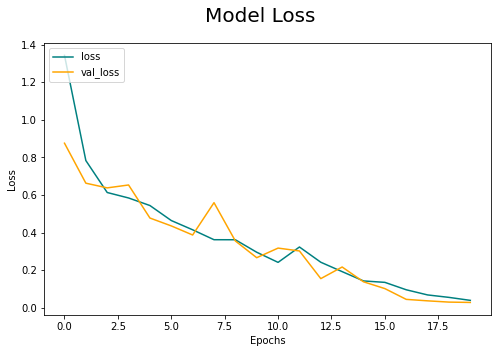

In [93]:
fig = plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Model Loss', fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

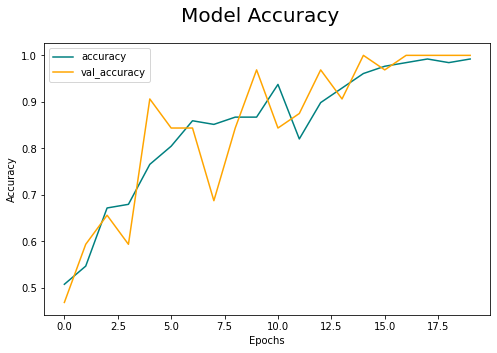

In [110]:
fig = plt.figure(figsize=(8,5))
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

## 5. Evaluating the model using different metrics


In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [96]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [97]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 96ms/step


In [98]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


Impressively, our model demonstrates remarkable performance, especially given the limited training data it was exposed to. Remarkably, all metric scores, denoting measures of its accuracy and precision, are consistently achieving a perfect score of 1. This suggests that the model is effectively capturing and generalizing patterns from the training data, showcasing its robust learning capabilities even with a smaller dataset.

### Random Test with External Images

To assess the model's performance on unseen data, we conducted a random test using images sourced from Google, representing both happy and sad expressions. This evaluation helps gauge the model's ability to generalize to new, real-world scenarios beyond the training dataset.

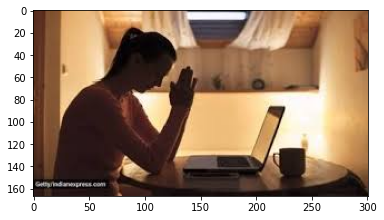

In [99]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

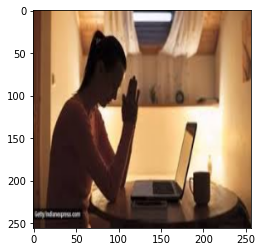

In [100]:
resize = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(resize.numpy().astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.show()

In [101]:
model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


array([[0.98006296]], dtype=float32)

## Save and Load Trained Model

1. **Save Model:**
   - The trained model is saved to a file named 'happysadmodel.keras' using `model.save()` in the 'models' directory.

2. **Load Model:**
   - The saved model is loaded back into a new variable (`new_model`) using `load_model()` for reuse or further analysis.

This process facilitates the preservation and retrieval of trained models, allowing for seamless deployment or prediction on new data without the need for retraining.


In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save(os.path.join('models', 'happysadmodel.keras'))

In [104]:
new_model = load_model(os.path.join('models','happysadmodel.keras'))

In [105]:
new_model

In [106]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 79ms/step


array([[0.98006296]], dtype=float32)

## Lets have some fun!!
### Predicting Emotions with Your Own Image

To use your own image and observe the model's predictions, follow these steps:

1. **Replace Image Path:**
    - Locate the variable `user_image_path` in the second last cell.
    - Replace `'sadtest.jpg'` with the file path to your own image.

2. **Run the Cell:**
    - After updating the image path, execute the cell and the next one.

3. **View Results:**
    - The cell will display your provided image along with the model's prediction for the emotion ('Happy' or 'Sad').

Feel free to experiment with different images of humans(**even yourself**) with different expressions and observe how the model performs on your custom inputs!


In [107]:
# Load the trained model
model = tf.keras.models.load_model('models/happysadmodel.keras')

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)
    return img


In [108]:
# User input
user_image_path = 'sadtest.jpg'  # Replace with the actual image path

### Run the next cell after replacing image path with your own image path!!

1/1 [==============================] - 0s 87ms/step

Note: Please be aware that this model, trained on a modest dataset, may not provide precise predictions for all images.


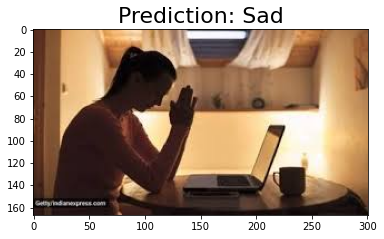

In [109]:
# Preprocess the user's image
processed_user_image = preprocess_image(user_image_path)

# Make prediction using the model
prediction = model.predict(processed_user_image)

# Get the class label (0 for 'happy', 1 for 'sad')
result = 'Happy' if prediction[0][0] < 0.5 else 'Sad'

# Display the user's image and prediction
user_img = cv2.imread(user_image_path)
plt.imshow(cv2.cvtColor(user_img, cv2.COLOR_BGR2RGB))
plt.title(f'Prediction: {result}', fontsize=22)

print("\nNote: Please be aware that this model, trained on a modest dataset, may not provide precise predictions for all images.")

plt.show()